# Assignment05(Convolution)

# 20142740 박세인

# https://github.com/dkdvkd/assignment05¶

# import packages

In [194]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

# get images

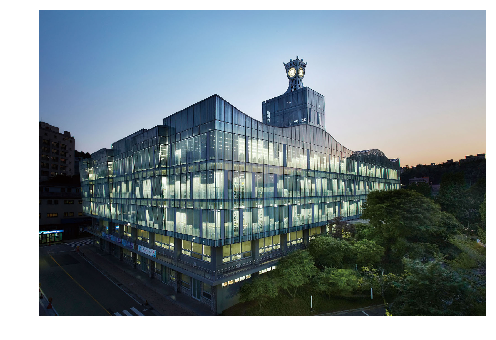

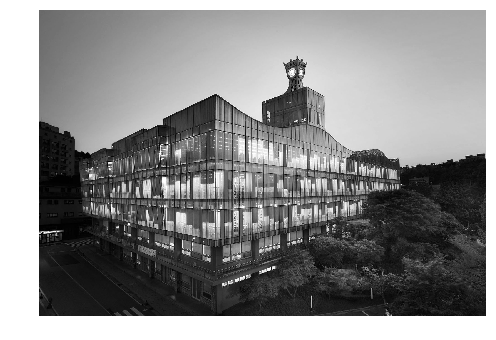

In [195]:
colorIm = plt.imread("cau.jpg")
plt.figure(figsize=(8,8))
plt.imshow(colorIm)
plt.axis('off')
plt.show()

grayIm= color.rgb2gray(colorIm)
#print(grayIm.shape)
#print(grayIm)
plt.figure(figsize=(8,8))
plt.imshow(grayIm,cmap='gray')
plt.axis('off')
plt.show()

# x-direction derivative function

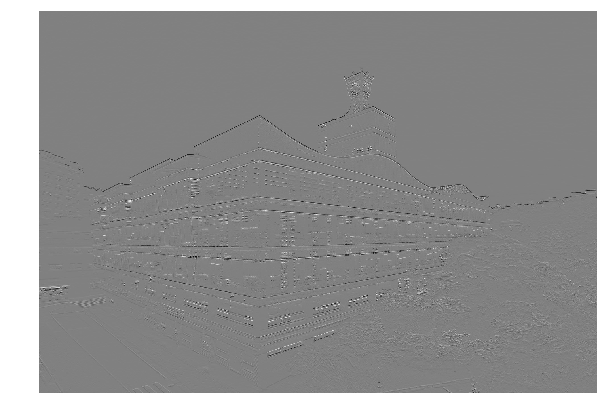

In [196]:
def gray_x_dirivative(grayIm):
    gray_x_dir_value=np.zeros((grayIm.shape[0],grayIm.shape[1]))

    for j in range(1, grayIm.shape[0]-1):
        for i in range(0, grayIm.shape[1]):
            gray_x_dir_value[j][i]= grayIm[j+1][i]-grayIm[j-1][i]
            
    return gray_x_dir_value

x1= gray_x_dirivative(grayIm)
plt.figure(figsize=(10,10))
plt.imshow(x1, cmap='gray')
plt.axis('off')
plt.show()


# y-direction derivative function

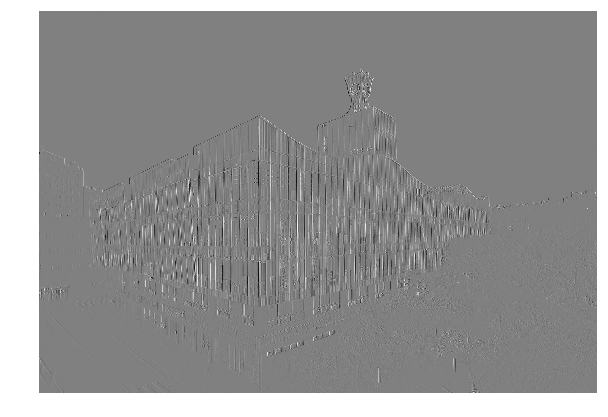

In [197]:
def gray_y_dirivative(grayIm):
    gray_y_dir_value=np.zeros((grayIm.shape[0],grayIm.shape[1]))
    #print(gray_y_dir_value)

    for j in range(0, grayIm.shape[0]):
        for i in range(1, grayIm.shape[1]-1):
            gray_y_dir_value[j][i]= grayIm[j][i+1]-grayIm[j][i-1]
            
    return gray_y_dir_value
            
y1= gray_y_dirivative(grayIm)
#print(gray_y_dir_value)
plt.figure(figsize=(10,10))
plt.imshow(y1, cmap='gray')
plt.axis('off')
plt.show()


# absoulte value of gradient

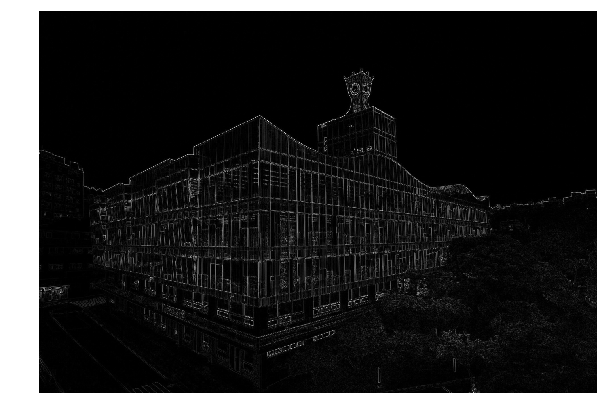

In [198]:
def gray_gradient_value(grayIm):
    gray_abs_gradient=np.zeros((grayIm.shape[0],grayIm.shape[1]))
    #print(gray_y_dir_value)

    for j in range(0, grayIm.shape[0]):
        for i in range(0, grayIm.shape[1]):
            #gray_abs_gradient[j][i] = ((gray_x_dir_value[j][i]**2)+(gray_y_dir_value[j][i]**2)**0.5)
            gray_abs_gradient[j][i] = abs(gray_x_dir_value[j][i]) + abs(gray_y_dir_value[j][i])
            
    return gray_abs_gradient

z1= gray_gradient_value(grayIm)
#print(gray_abs_gradient)
plt.figure(figsize=(10,10))
plt.imshow(z1, cmap='gray')
plt.axis('off')
plt.show()

# direction of gradient

C:\Users\hi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\hi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


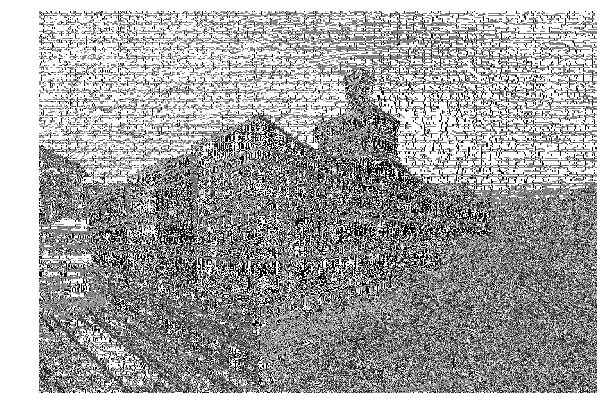

In [199]:
def gray_gradient_direction(grayIm):
    gray_direc_gradient=np.zeros((grayIm.shape[0],grayIm.shape[1]))
    #print(gray_y_dir_value)

    for j in range(0, grayIm.shape[0]):
        for i in range(0, grayIm.shape[1]):
            if(gray_y_dir_value[j][i]==0 or (gray_x_dir_value[j][i])==0):
                gray_direc_gradient[j][i]=0
            gray_direc_gradient[j][i] = np.arctan((gray_y_dir_value[j][i])/(gray_x_dir_value[j][i]))
    return gray_direc_gradient
            
t1= gray_gradient_direction(grayIm)
plt.figure(figsize=(10,10))
plt.imshow(t1, cmap='gray')
plt.axis('off', cmap='gray')
plt.show()


# smoothing kernal

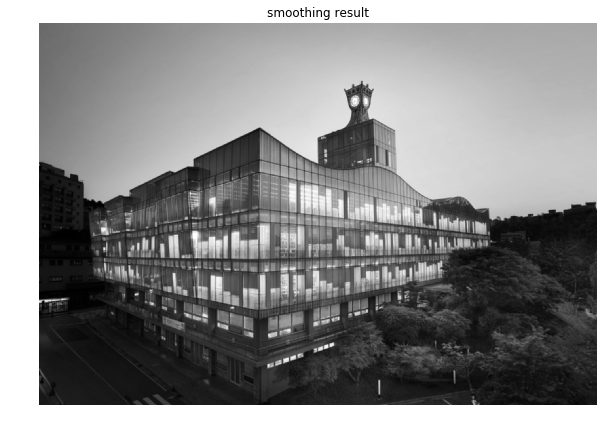

In [200]:
s_ker= np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
s_ker= s_ker*(1/25)
"""
sh_ker= np.array([[1,1,1],[1,1,1],[1,1,1]])
sh_ker=sh_ker*(1/9)
"""
img_conv= signal.convolve2d(grayIm, s_ker, boundary='symm', mode='same') 
x2= plt.figure(figsize=(10, 10))
plt.title('smoothing result')
plt.imshow(img_conv, cmap='gray')
plt.axis('off')
plt.show()

#print('같나요?', np.allclose(grayCat,cat_conv))

# own kernal

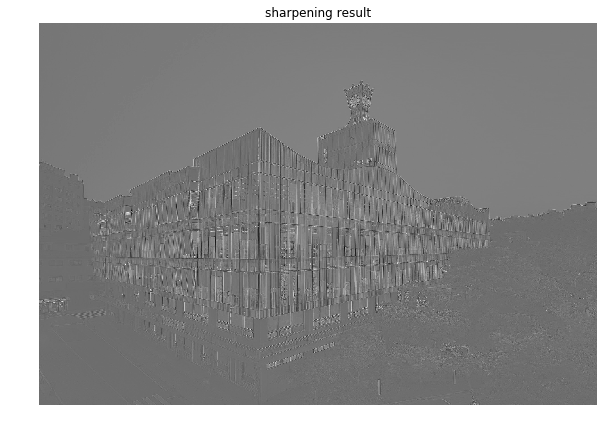

In [201]:
#sh_ker= np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sh_ker= np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

im_conv= signal.convolve2d(grayIm, sh_ker, boundary='symm', mode='same') 
x2= plt.figure(figsize=(10, 10))
plt.title('sharpening result')
plt.imshow(im_conv, cmap='gray')
plt.axis('off')
plt.show()



# cat images

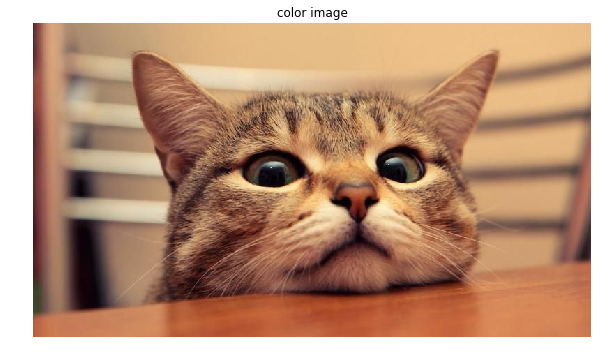

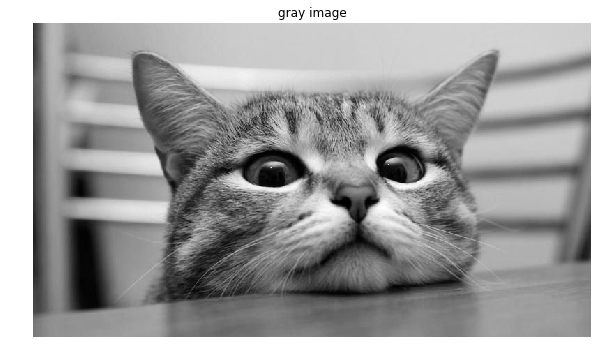

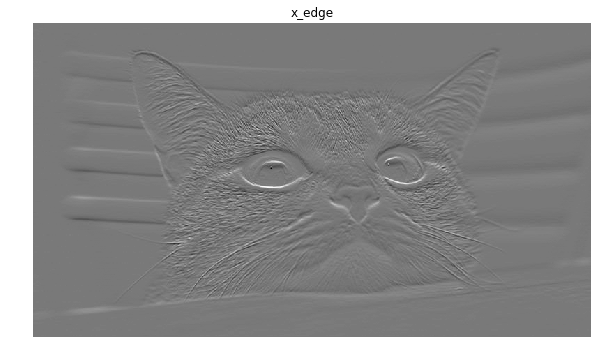

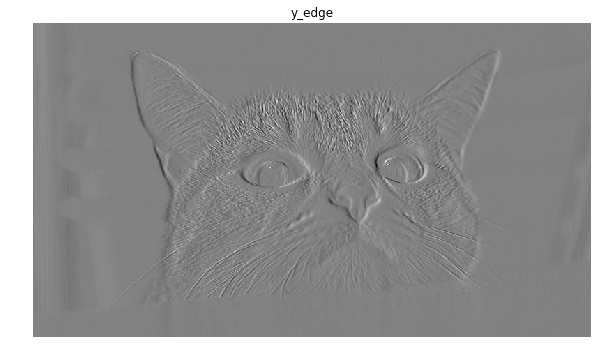

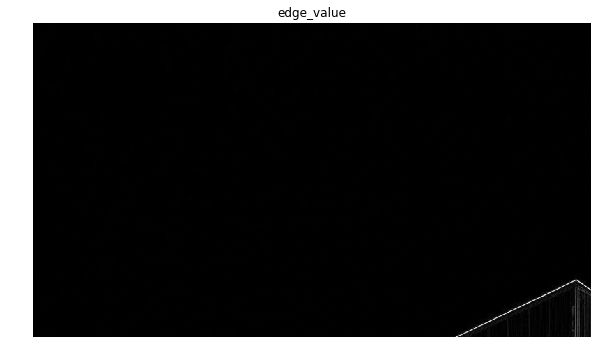

C:\Users\hi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\hi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


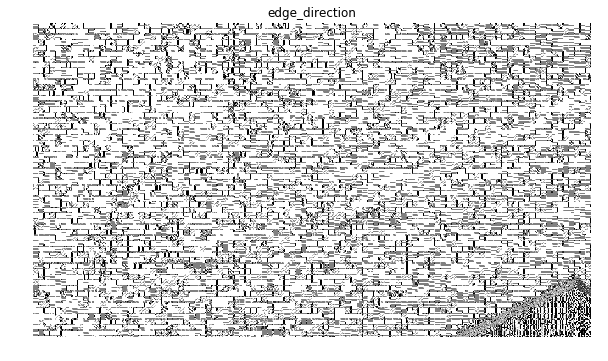

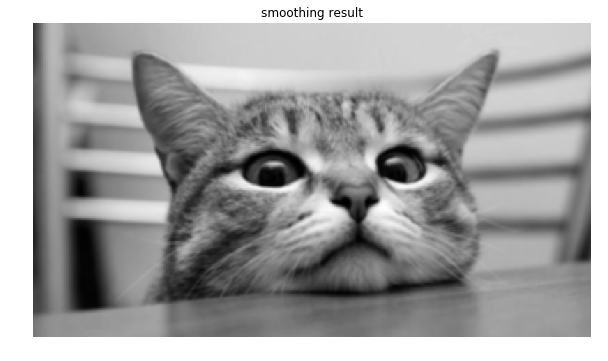

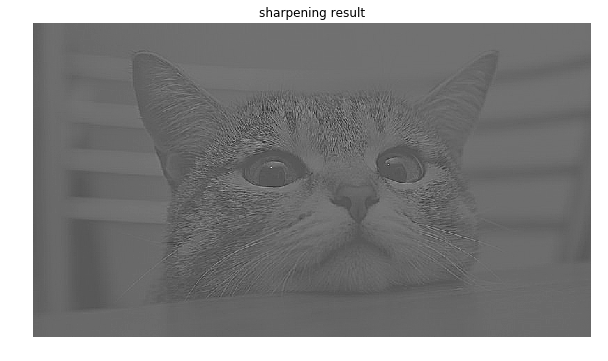

In [202]:
colorCat= plt.imread("cat.jpg")
plt.figure(figsize=(10,10))
plt.title('color image')
plt.imshow(colorCat)
plt.axis('off')
plt.show()

grayCat= color.rgb2gray(colorCat)
plt.figure(figsize=(10,10))
plt.title('gray image')
plt.imshow(grayCat,cmap='gray')
plt.axis('off')
plt.show()

x2= gray_x_dirivative(grayCat)
plt.figure(figsize=(10,10))
plt.title('x_edge')
plt.imshow(x2, cmap='gray')
plt.axis('off')
plt.show()

y2= gray_y_dirivative(grayCat)
plt.figure(figsize=(10,10))
plt.title('y_edge')
plt.imshow(y2, cmap='gray')
plt.axis('off')
plt.show()

z2= gray_gradient_value(grayCat)
#print(gray_abs_gradient)
plt.figure(figsize=(10,10))
plt.title('edge_value')
plt.imshow(z2, cmap='gray')
plt.axis('off')
plt.show()

t2= gray_gradient_direction(grayCat)
plt.figure(figsize=(10,10))
plt.title('edge_direction')
plt.imshow(t2, cmap='gray')
plt.axis('off')
plt.show()

s_ker= np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
s_ker= s_ker*(1/25)
cat_conv= signal.convolve2d(grayCat, s_ker, boundary='symm', mode='same') 
sm2= plt.figure(figsize=(10, 10))
plt.title('smoothing result')
plt.imshow(cat_conv, cmap='gray')
plt.axis('off')
plt.show()

cat_conv= signal.convolve2d(grayCat, sh_ker, boundary='symm', mode='same') 
sh2= plt.figure(figsize=(10, 10))
plt.title('sharpening result')
plt.imshow(cat_conv, cmap='gray')
plt.axis('off')
plt.show()